In [7]:
#Import module
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [8]:
#Read in data
df_player = pd.read_csv('player_cleaned.csv')
df_team = pd.read_csv('team_cleaned.csv')
df_kill = pd.read_csv('kill_cleaned.csv')

Examine data frames

In [9]:
print(df_player.shape)
df_player.head()

(66, 15)


,rank,player,match,damages,knock,kill,survive,assist,longest,traveled,accuracy,main_weapon,kill_per_match,damages_per_match,team_placement
0,1,DxG_Sapauu,20,6109.44,27,37,1397,19,351,143.50,0.1176,FNFal,1.85,305.4720,1
1,2,AAP_CeeJay18,20,4270.08,20,32,1330,14,505,118.84,0.1024,Mini14,1.60,213.5040,4
2,3,BRU_Eaddy,20,3548.97,19,30,1348,10,413,120.05,0.1573,FNFal,1.50,177.4485,3
3,4,QC_Gems,20,4935.77,26,29,1265,18,422,92.29,0.1158,FNFal,1.45,246.7885,2
4,5,DIC_AnhQuan,20,4549.64,17,29,1245,13,318,84.91,0.1665,HK416,1.45,227.4820,7


In [10]:
print(df_kill.shape)
df_kill.head()

(16, 11)


,team,phase1,phase2,phase3,phase4,phase5,phase6,phase7,phase8,phase9,total_kill
0,DXG,0.0316,0.0316,0.4316,0.5474,0.4211,0.7368,0.3368,0.2316,0.3263,95
1,QC,0.2917,0.1771,0.1146,0.4792,0.8229,0.0417,0.2708,0.3021,0.0000,96
2,BRU,0.1059,0.0471,0.4235,0.4118,0.5529,0.4000,0.2235,0.1765,0.2824,85
3,AAP,0.4235,0.3412,0.1059,0.6235,0.8588,0.1529,0.2588,0.2471,0.2471,85
4,MiTH,0.2135,0.1573,0.0899,0.3034,0.7303,0.5618,0.3146,0.1910,0.6966,89


Examine data: player data frame

Text(0.5, 1.0, "Figure 2: players' kill counts box plot")

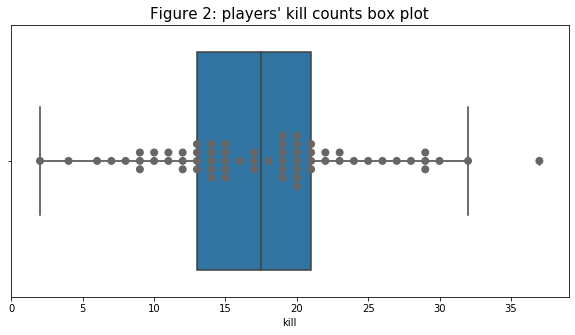

In [12]:
#Kil count boxplot
plt.figure(figsize=(10,5))
sns.boxplot(df_player.kill)
sns.swarmplot(df_player.kill, size=8, color=".4", linewidth=0)
plt.title("Figure 2: players' kill counts box plot", size = 15)

Text(0.5, 1.0, "Figure 3: teams' kill counts box plot")

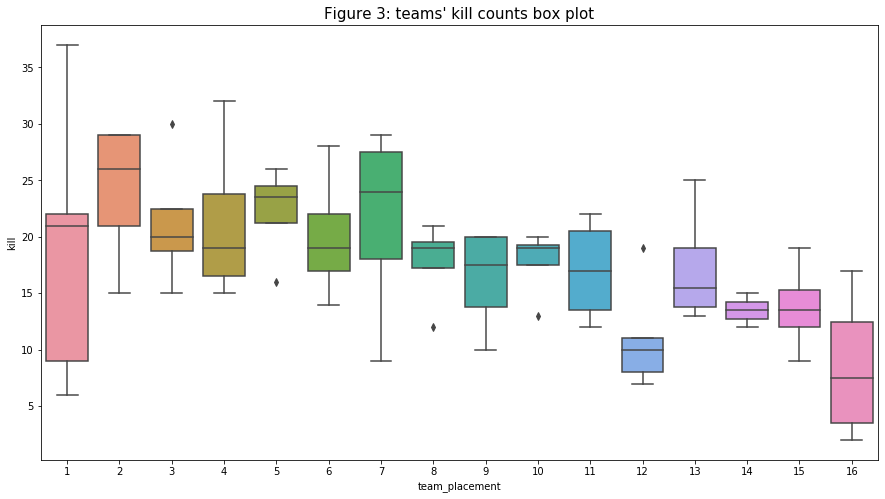

In [13]:
#Kill vs. team_placement box plot
plt.figure(figsize=(15, 8))
sns.boxplot(df_player.team_placement, df_player.kill)
plt.title("Figure 3: teams' kill counts box plot", size = 15)

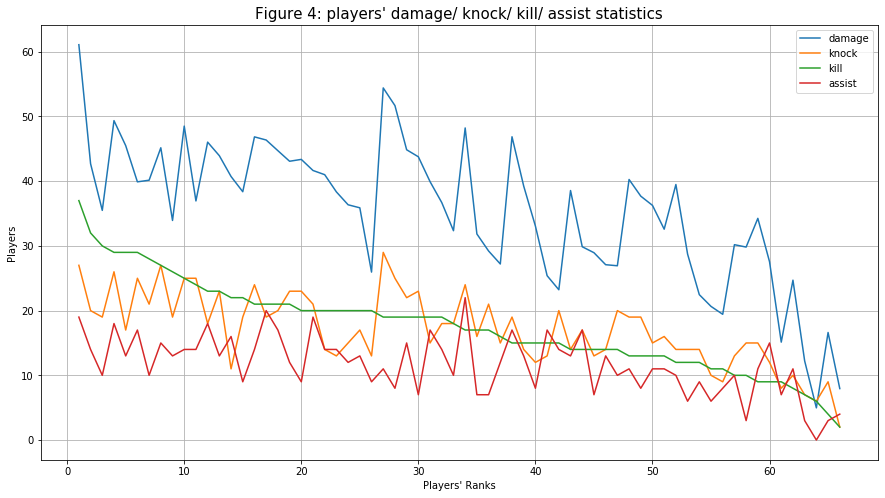

In [14]:
#Damagae/knock/kill/assist
plt.figure(figsize=(15, 8))
plt.plot(df_player['rank'], (df_player.damages / 100), label = 'damage')
plt.plot(df_player['rank'], df_player.knock, label = 'knock')
plt.plot(df_player['rank'], df_player.kill, label = 'kill')
plt.plot(df_player['rank'], df_player.assist, label = 'assist')
plt.title("Figure 4: players' damage/ knock/ kill/ assist statistics", size = 15)
plt.xlabel("Players' Ranks")
plt.ylabel("Players")
plt.legend()
plt.grid()

Text(0.5, 1.0, 'Figure 5: number of matches players compete in')

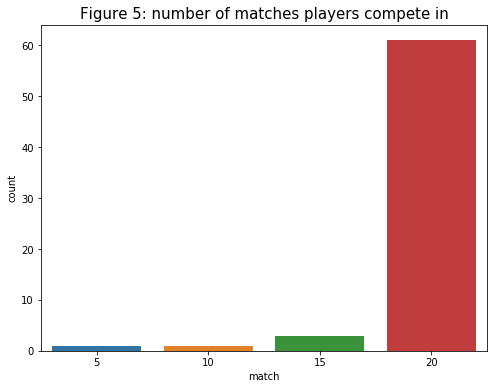

In [18]:
#Match count plot
plt.figure(figsize=(8, 6))
sns.countplot(df_player.match)
plt.title("Figure 5: number of matches players compete in", size = 15)

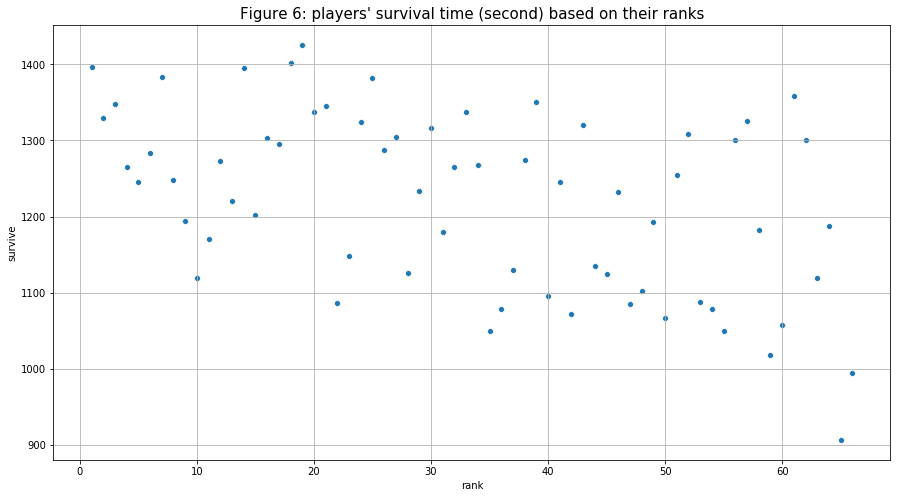

In [15]:
#Survive
plt.figure(figsize=(15, 8))
sns.scatterplot(df_player['rank'], df_player.survive)
plt.title("Figure 6: players' survival time (second) based on their ranks", size = 15)
plt.grid()

Text(0.5, 1.0, "Figure 7: teams' survival time box plot")

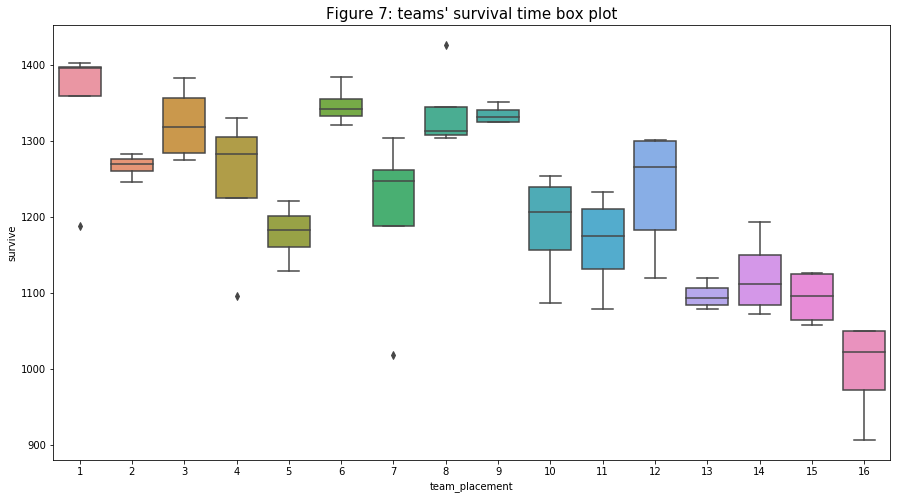

In [19]:
#Survive vs. team_placement boxplot
plt.figure(figsize=(15, 8))
sns.boxplot(df_player.team_placement, df_player.survive)
plt.title("Figure 7: teams' survival time box plot", size = 15)

Text(0.5, 1, 'Figure 8: relationship between "accuracy" and "longest" variables')

<Figure size 720x576 with 0 Axes>

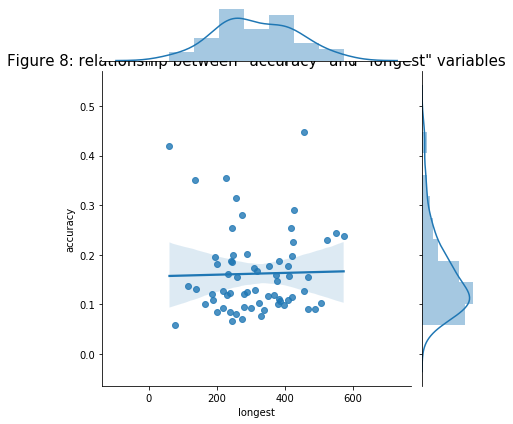

In [20]:
#Longest vs. accuracy
plt.figure(figsize=(10, 8))
sns.jointplot(df_player.longest, df_player.accuracy, kind="reg")
plt.title('Figure 8: relationship between "accuracy" and "longest" variables', size = 15)

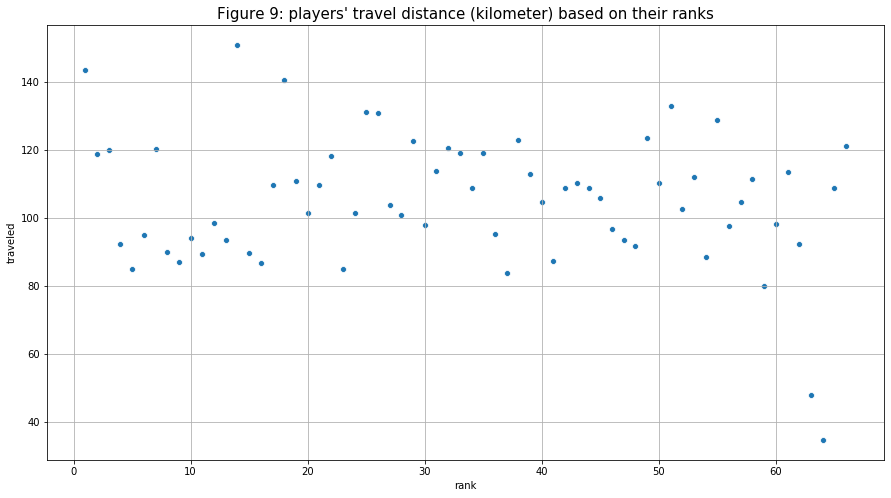

In [21]:
#Travel distance
plt.figure(figsize=(15, 8))
sns.scatterplot(df_player['rank'],df_player.traveled)
plt.title("Figure 9: players' travel distance (kilometer) based on their ranks", size = 15)
plt.grid()

Substitute players

In [21]:
df_player.match.value_counts()

0    61
1     5
Name: sub_player, dtype: int64

In [23]:
sub_player = []
for x in range(len(df_player.match)):
    if df_player.match[x] == 20:
        sub = 0
    else:
        sub = 1
    sub_player.append(sub)
    
df_player['sub_player'] = sub_player

Text(0.5, 1.0, 'Figure 11: "kill_per_match" comparison between starting players and subtitute players')

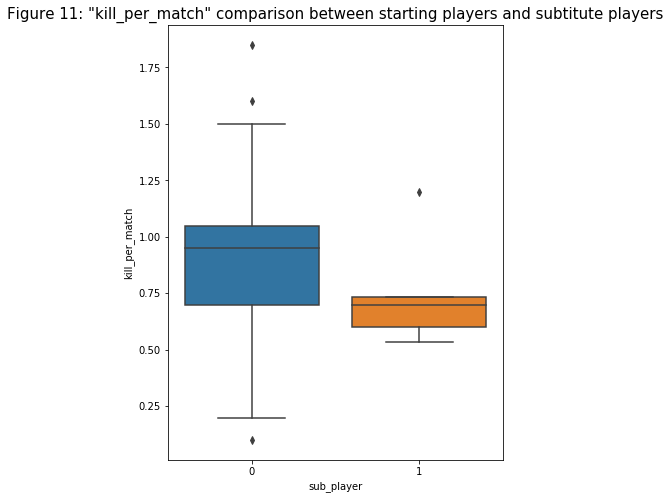

In [24]:
#Compare subtitute players with starting players
plt.figure(figsize=(6, 8))
sns.boxplot(df_player.sub_player, df_player.kill_per_match)
plt.title('Figure 11: "kill_per_match" comparison between starting players and subtitute players', size = 15)

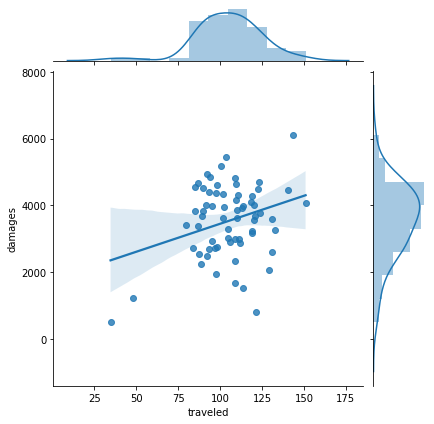

In [54]:
#Travel vs. damages
sns.jointplot(df_player.traveled, df_player.damages, kind="reg")
plt.show()

Text(0.5, 1.0, 'Figure 13: "damages" box plot of each weapon')

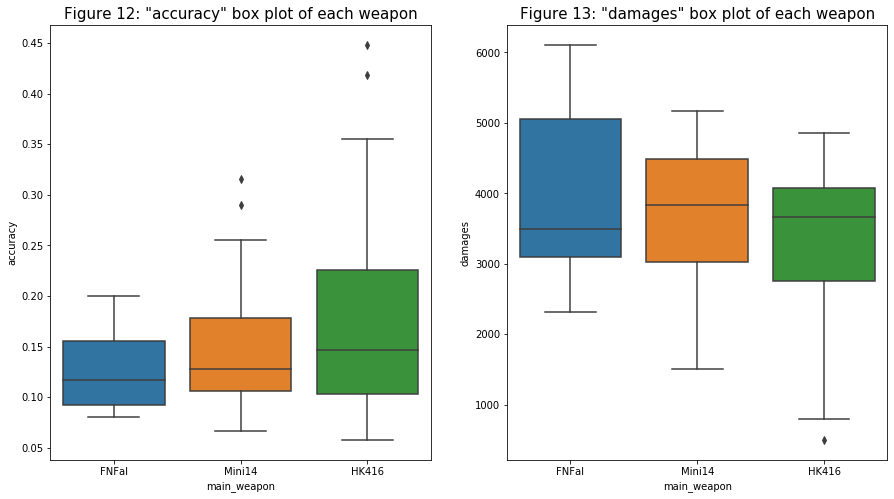

In [25]:
#Main_weapon vs. accuracy/damages
plt.figure(figsize=(15, 8))
plt.subplot(121)
sns.boxplot(df_player.main_weapon, df_player.accuracy)
plt.title('Figure 12: "accuracy" box plot of each weapon', size = 15)

plt.subplot(122)
sns.boxplot(df_player.main_weapon, df_player.damages)
plt.title('Figure 13: "damages" box plot of each weapon', size = 15)

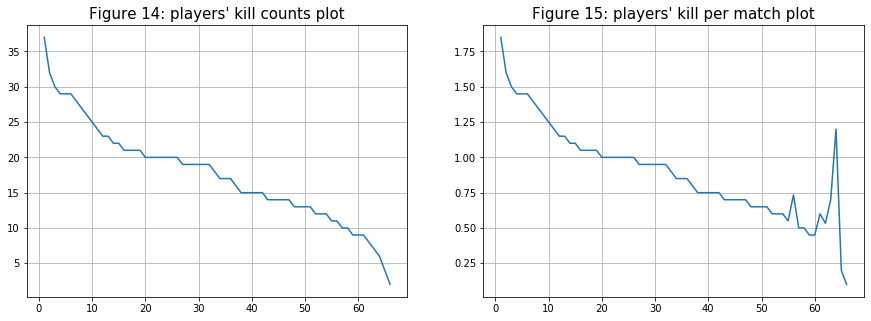

In [26]:
#Kill vs. kill_per_match
plt.figure(figsize=(15, 5))
plt.subplot(121)
plt.plot(df_player['rank'], df_player.kill)
plt.title("Figure 14: players' kill counts plot", size = 15)
plt.grid()

plt.subplot(122)
plt.plot(df_player['rank'], df_player.kill_per_match)
plt.title("Figure 15: players' kill per match plot", size = 15)
plt.grid()

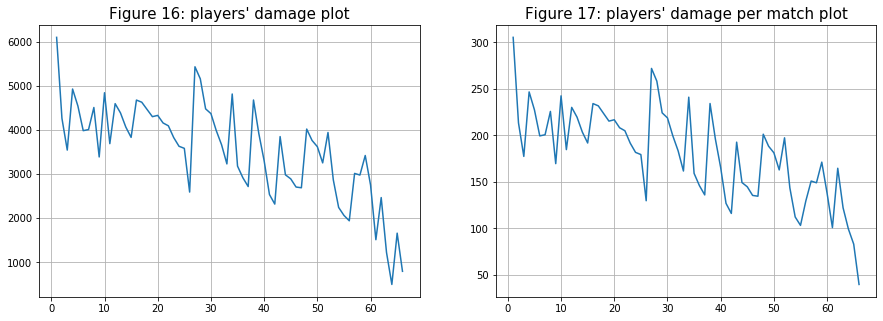

In [27]:
#Damages vs. damage_per_match
plt.figure(figsize=(15, 5))
plt.subplot(121)
plt.plot(df_player['rank'], df_player.damages)
plt.title("Figure 16: players' damage plot", size = 15)
plt.grid()

plt.subplot(122)
plt.plot(df_player['rank'], df_player.damages_per_match)
plt.title("Figure 17: players' damage per match plot", size = 15)
plt.grid()

Pearson correlation between variables

Text(0.5, 1, 'Figure 18: variables correlations heatmap')

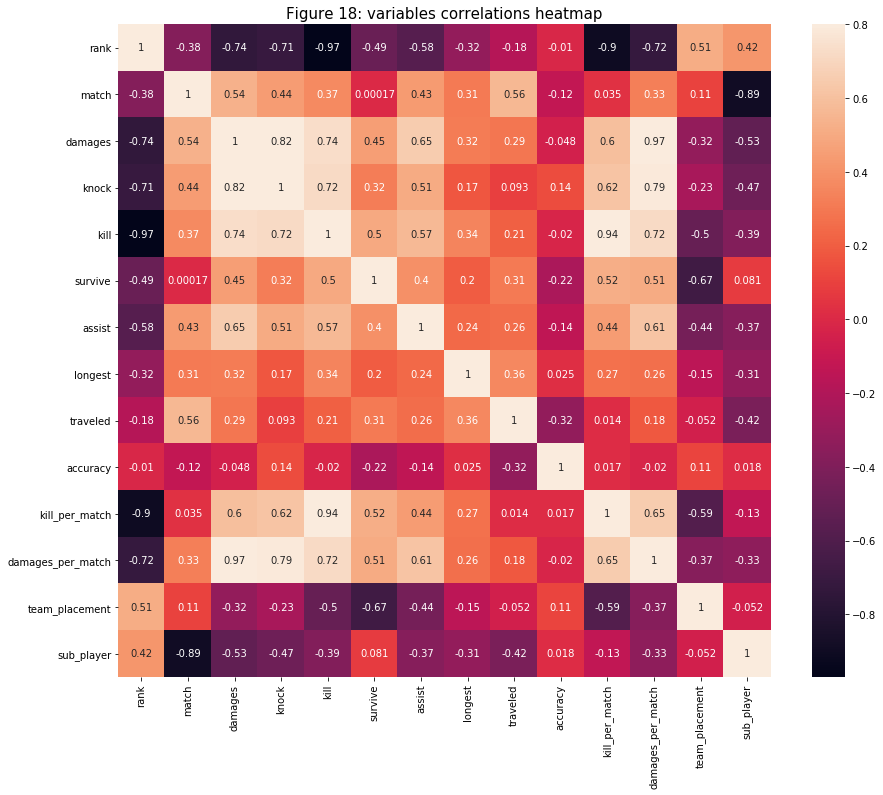

In [28]:
#Heat map
corr = df_player.corr()
plt.subplots(figsize=(15, 12))
sns.heatmap(corr, vmax = .8, square = True, annot = True)
plt.title('Figure 18: variables correlations heatmap', fontsize=15)

Examine data: kill phase data frame

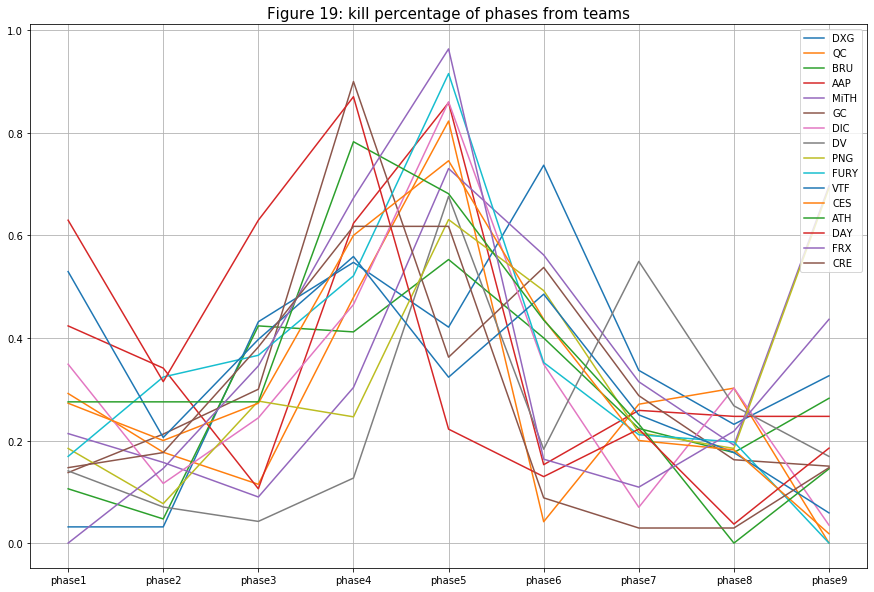

In [29]:
plt.subplots(figsize=(15, 10))
for i in range(len(df_kill.team)):
    plt.plot(df_kill.iloc[i,1:-1], label = df_kill.team[i])
    plt.legend()
plt.title('Figure 19: kill percentage of phases from teams', size = 15)
plt.grid()

Examine data: team data frame

In [31]:
df_team = df_team[['team_rank', 'team', 'r1_point', 'r2_point', 'r3_point', 'r4_point', 'r5_point', 'r6_point', 'r7_point', 'r8_point', 'r9_point', 'r10_point', 'r11_point', 'r12_point', 'r13_point', 'r14_point', 'r15_point', 'r16_point', 'r17_point', 'r18_point', 'r19_point', 'r20_point']]

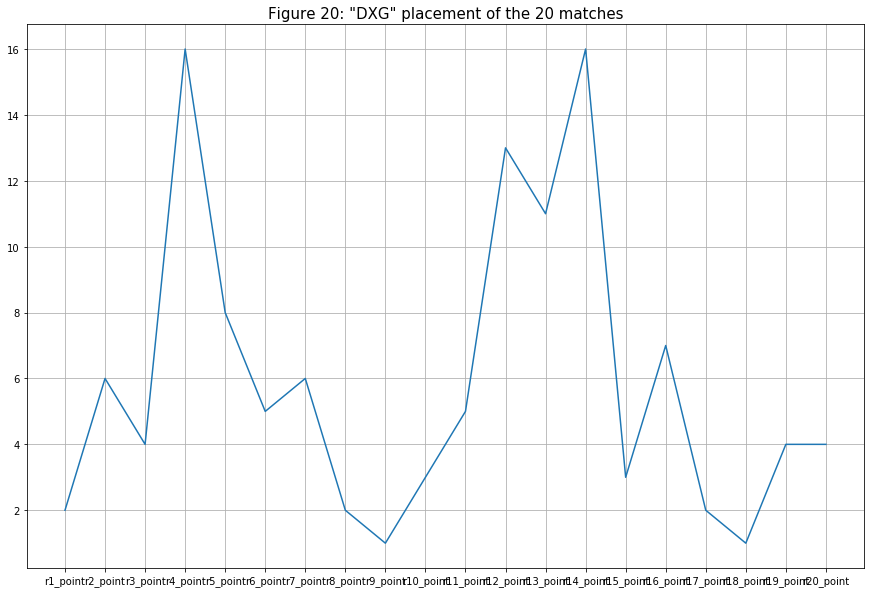

In [32]:
#Rank1
plt.subplots(figsize=(15, 10))
plt.plot(df_team.iloc[0,2:])
plt.title('Figure 20: "DXG" placement of the 20 matches', size = 15)
plt.grid()

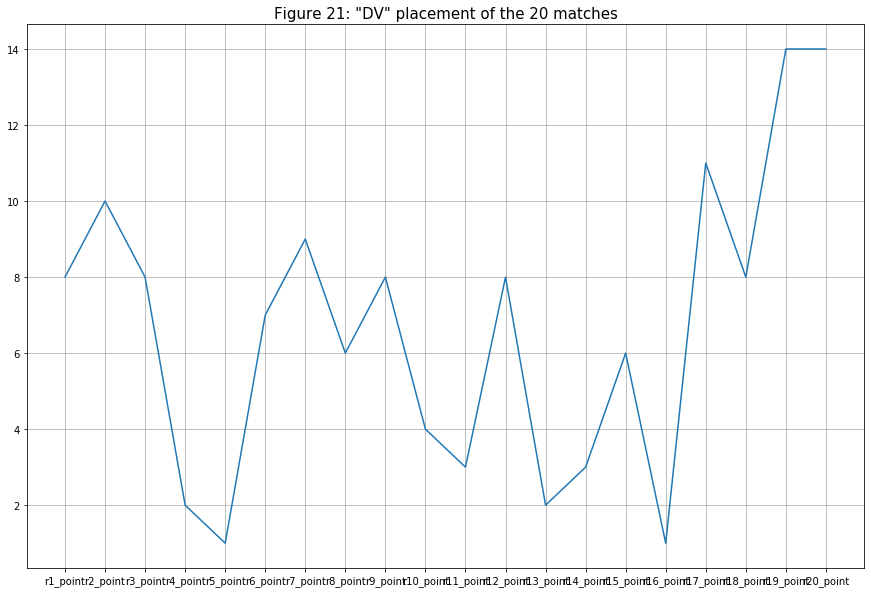

In [33]:
#Rank8
plt.subplots(figsize=(15, 10))
plt.plot(df_team.iloc[7,2:])
plt.title('Figure 21: "DV" placement of the 20 matches', size = 15)
plt.grid()

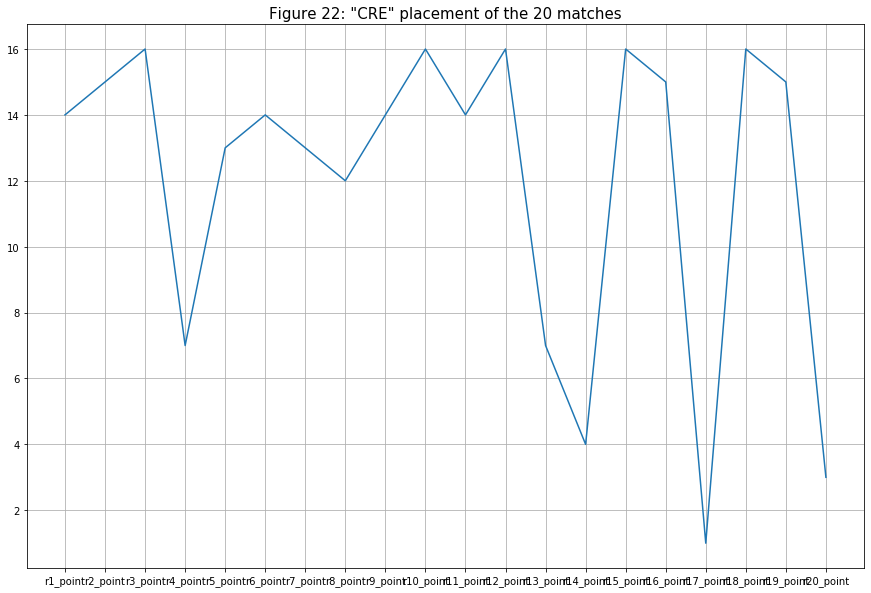

In [34]:
#Rank16
plt.subplots(figsize=(15, 10))
plt.plot(df_team.iloc[15,2:])
plt.title('Figure 22: "CRE" placement of the 20 matches', size = 15)
plt.grid()